UTS Penambangan data dan Analisis Bisnis

BAGIAN B
Dataset Titanic: Machine Learning from Disaster adalah dataset populer dari Kaggle yang digunakan untuk memprediksi kemungkinan selamanya penumpang kapal Titanic berdasarkan berbagai fitur penumpang seperti umur, jenis kelamin, kelas tiket, dan sebagainya. Download dataset pada link berikut hipsebit ly datasen
Silakan jawab pertanyaan berikut dengan bantuan python.


1. Eksplorasi Awal

a. Berapa jumlah total penumpang dalam data?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load data
data = pd.read_csv('/content/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Total Penumpang
total_penumpang = len(data)
print(f"Jumlah total penumpang dalam data: {total_penumpang}")

Jumlah total penumpang dalam data: 891


total penumpang pada kapal Titannic yaitu 891 orang

b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik

In [5]:
# Jumlah penumpang selamat vs tidak selamat
penumpang_selamat = data['Survived'].value_counts()
print("Tabel jumlah penumpang yang selamat dan tidak selamat:")
print(penumpang_selamat)

Tabel jumlah penumpang yang selamat dan tidak selamat:
Survived
0    549
1    342
Name: count, dtype: int64


0 = tidak selamat

1 = selamat

berdasarkan data jumlah penumpang selamat sekitar 342 orang dan jumlah penumpang yang tidak selamat 549 orang

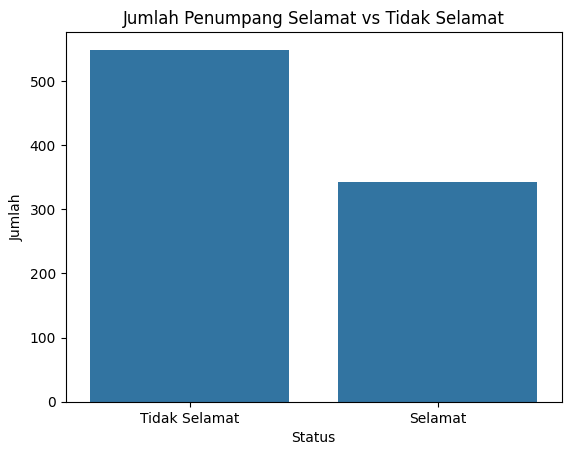

In [6]:
# Visualisasi
sns.countplot(data=data, x='Survived')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [8]:
# Rata-rata umur
mean_umur = data['Age'].mean()
mean_umur

np.float64(29.69911764705882)

rata-rata umur penumpang kapal titanic yaitu 29,67

In [11]:
# Penumpang termuda dan tertua
penumpang_termuda = data[data['Age'] == data['Age'].min()]
penumpang_termuda

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


penumpang kapal titanic termuda bernama Thomas Master Assad Alexander dengan usia 0,42 tahun atau bayi sekitar 5 bulan

In [12]:
penumpang_tertua = data[data['Age'] == data['Age'].max()]
penumpang_tertua

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


sedangkan penumpang tertua pada kapal titanic Mr. Algernon Henry Wilson yang berusia 80 tahun

d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan

In [13]:
# Tabel jumlah berdasarkan jenis kelamin
tabel_gender = data['Sex'].value_counts()
tabel_gender

,count
Sex,
male,577
female,314


berdasarkan pengelompokkan jenis kelamin, jumlah penumpang kapal titanic yaitu
perempuan = 314 orang

laki-laki = 577 orang

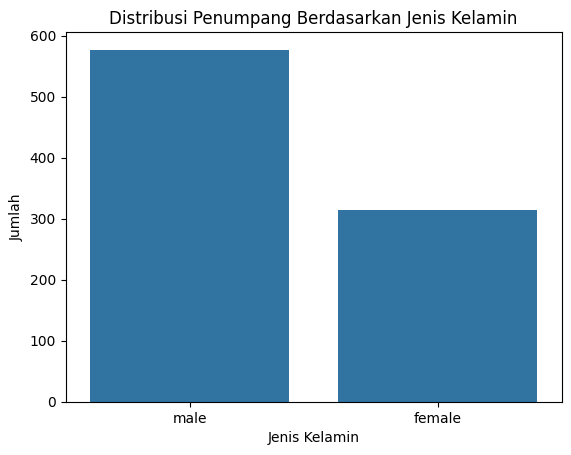

In [14]:
# Visualisasi
sns.countplot(data=data, x='Sex')
plt.title('Distribusi Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

In [17]:
# Jumlah penumpang berdasarkan kelas
tabel_kelas = data['Pclass'].value_counts()
tabel_kelas

,count
Pclass,
3,491
1,216
2,184


In [18]:
persen_kelas_1 = (tabel_kelas[1] / len(data)) * 100
persen_kelas_1

np.float64(24.242424242424242)

persentase total data yang berada pada kelas 1 yaitu 24,24%

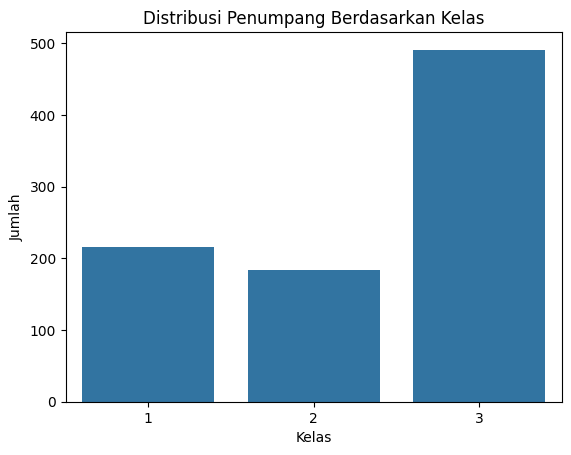

In [19]:
# Visualisasi
sns.countplot(data=data, x='Pclass')
plt.title('Distribusi Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

2. Preprocessing

a. Apakah terdapat missing value pada data tersebut?

In [36]:
# Load data
data = pd.read_csv('/content/Titanic-Dataset.csv')

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


terdapat missing value pada kolom Age, Cabin dan embarked dengan jumlah

Age = 177

Cabin = 687

Embarked = 2

oleh karena itu diperlukannya penanganan missing value

b. Jika ya, apa yang anda lakukan?

In [37]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(columns='Cabin', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-37-2e61e12e06c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-37-2e61e12e06c8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

a. Kolom Age bisa diisi dengan nilai rata-rata atau median

b. Kolom Cabin banyak kosong, bisa dihapus karena missing terlalu besar

c. Kolom Embarked bisa diisi dengan modus (nilai terbanyak)

In [38]:
print("Cek setelah imputasi:")
print(data.isnull().sum())

Cek setelah imputasi:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!

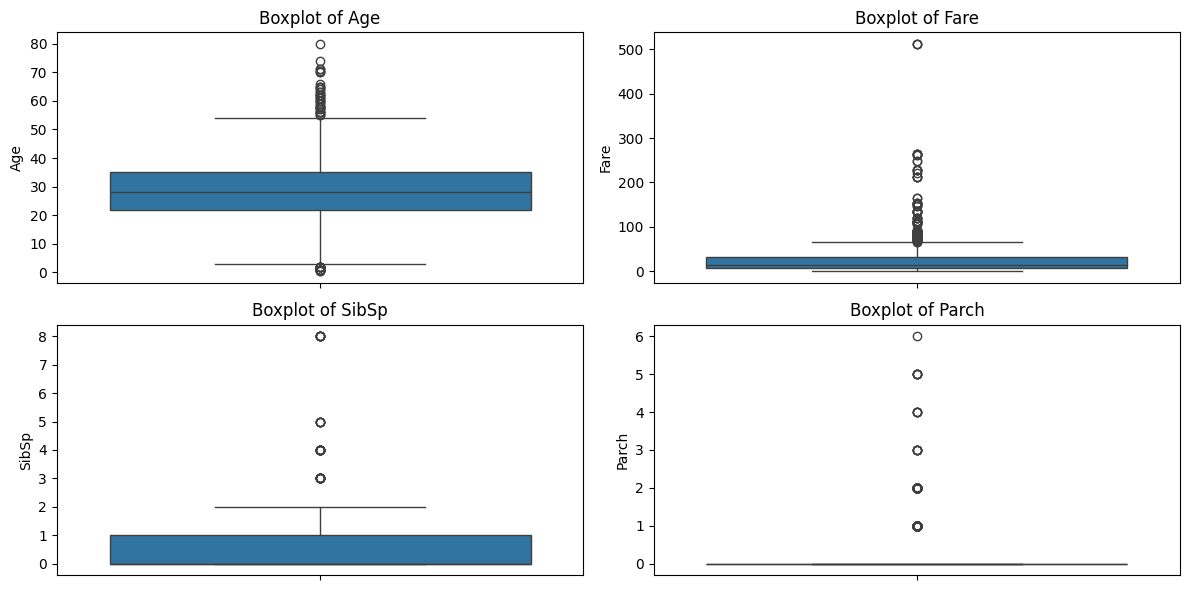

In [41]:
# Kolom numerik dari Titanic dataset
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Visualisasi Boxplot untuk outlier
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

outlier merupakan nilai yang jauh berbeda dari nilai lainnya dari kumpulan. pada kolom fare terlihat ada outlier (nilai sangat banyak) dan kolom age tidak terlalu ekstrem

d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

In [42]:
# Definisi fungsi Winsorizing menggunakan IQR
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Kolom numerik Titanic yang ingin ditangani outlier-nya
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Terapkan Winsorizing untuk tiap kolom
for col in num_cols:
    winsorize_iqr(data, col)

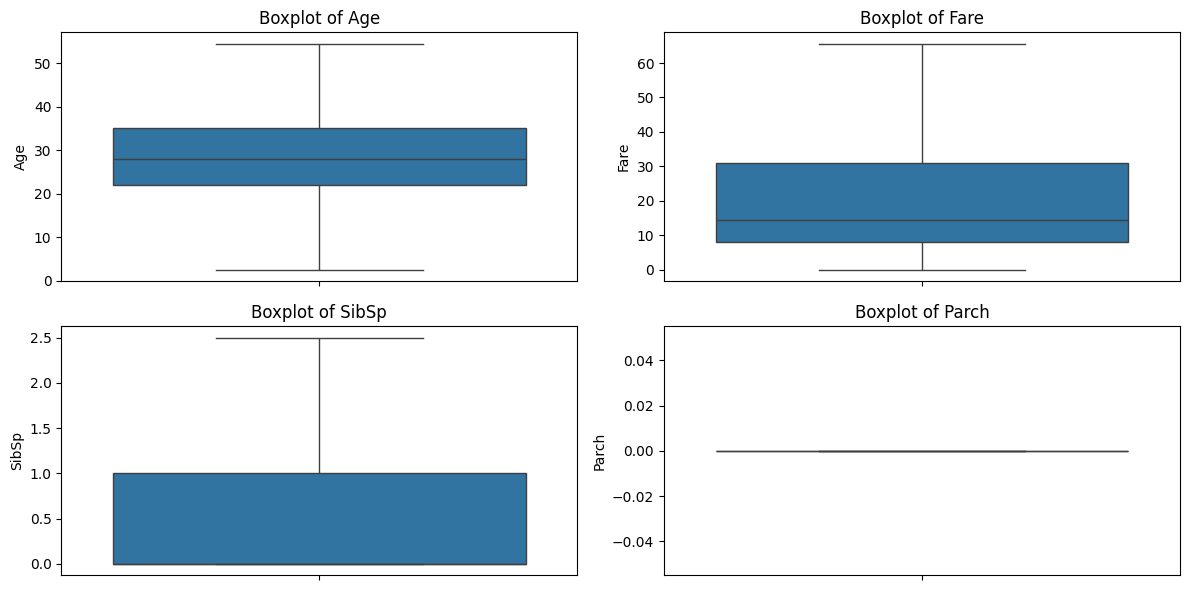

In [43]:
# Kolom numerik dari Titanic dataset
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Visualisasi Boxplot untuk outlier
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

outlier perlu diatasu dengan menggunakan metode winsorizing atau mengganti outlier dengan batas IQR

e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Fare_scaled'] = scaler.fit_transform(data[['Fare']])

3. Modelling
a. jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut?

pembagian data dilakukan dengan tujuan agar dapat melatih model pada sebagian data training dan menguji performa model pada data testing atau data yang belum pernah dilihat sebelumnya . hal iini juga bertujuan untuk bertujuan mencegah overfitting

b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

In [55]:
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

persentase pembagian split data biasanya 80% untuk data training dan 20% untuk data testing karena training cukup banyak data dan testing cukup untuk evaluasi

c. Buatlah model klasifikasi dari 3 algortima yang berbeda. Jelaskan masing-masing model dan cara kerjanya

1. Logistic regression
model statistik yang digunakan untuk klasifikasi biner

2. Random Forest
kumplan decission tree. hasil voting dari banyak pohon keputusan

3. K-Nearest Neighbors (KNN)
untuk menentukan kelas berdasarkan tetangga terdekat dalam fitur

In [60]:
data_model = data.colomns=['Name','Ticket','Cabin']

<ipython-input-60-5b5b18e0d65c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_model = data.colomns=['Name','Ticket','Cabin']


In [61]:
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [70]:
# Drop kolom yang tidak berguna atau berupa teks
# df_clean = data.drop(columns=['Name', 'Ticket', 'Cabin']) # Original line causing error
# Check if the columns exist before dropping
columns_to_drop = ['Name', 'Ticket']
if 'Cabin' in data.columns:
    columns_to_drop.append('Cabin')
df_clean = data.drop(columns=columns_to_drop)

# One-hot encode kolom kategorikal
data_encoded = pd.get_dummies(df_clean, columns=['Sex', 'Embarked'], drop_first=True)

# ... (rest of the code remains the same) ...

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Pisahkan fitur dan target
X = data_encoded.drop(columns='Survived')
y = data_encoded['Survived']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))

# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# 3. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\n=== K-Nearest Neighbors (KNN) ===")
print(classification_report(y_test, y_pred_knn))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179


=== K-Nearest Neighbors (KNN) ===
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       105
           1       0.63      0.42      0.50        74

    accuracy                           0.66       179
   macro avg       0.65      0.62      0.6

d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?
Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik.

nilai evaluasi:

1. Logistic Regression

Accuracy: 0.80

Precision (kelas 1): 0.76

Recall (kelas 1): 0.74

F1-score (kelas 1): 0.75

2. Random Forest

Accuracy: 0.84

Precision (kelas 1): 0.85

Recall (kelas 1): 0.76

F1-score (kelas 1): 0.80

3. K-Nearest Neighbors (KNN)

Accuracy: 0.66

Precision (kelas 1): 0.63

Recall (kelas 1): 0.42

F1-score (kelas 1): 0.50


Model yang memberikan hasil terbaik adalah Random Forest, dengan nilai accuracy tertinggi 0.84 dan f1-score tertinggi untuk kelas 0.80. Model ini mengungguli Logistic Regression dan KNN dalam semua metrik utama.

random forest metode yang bekerja lebih baik. random forest merupakan model yang menggabungkan banyak decission tree sehingga lebih stabil dan mampu menangani data dengan feature yang kompleks. model ini juga lebih tahan terhadap overfitting

sedangakan model yang paling lemah yaitu KNN karena model ini sensitif terhadap fitur yang belum diskalakan dengan baik dan sensitif tehadap noise dan ketidakseimbangan kelas.

4. Evaluasi

a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"'?


berdasarkan classification dari model terbaik nilai precision dann recak untuk kelas selamat:

precision = 0.85 , yang dapat diartikan bahwa dari semua penumpang kapal titanic prediksi persentase penumpang yang selamat sebanyak 85%

recall = 0.76, yang dapat diartikan dari semua penumpanng kapal titanic yang benar-benar selamat model berhasil menangkap 76%

b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?

In [76]:
import numpy as np

# Jumlah penumpang yang diprediksi selamat
predicted_survived = np.sum(y_pred_rf == 1)
predicted_survived

np.int64(66)

banyak penumpang yang diprediksi selamat yaitu 66 penumpang

In [77]:
# Jumlah penumpang yang benar-benar selamat dari yang diprediksi selamat
true_positives = np.sum((y_pred_rf == 1) & (y_test == 1))
true_positives

np.int64(56)

banyak penumpang yang diprediksi benar-benar selamat yaitu 56 penumpang